## Challenge: Crowd (Object) Counting

<img src="http://personal.ie.cuhk.edu.hk/~ccloy/images/shopping_mall_annotated.jpg" title="Crowd Counting" width="30%"/>

Para esta sección final se evaluará todo lo que han aprendido a través de un desafío en donde puedan competir y medir sus resultados *in time* en la plataforma de __[Kaggle](https://www.kaggle.com/)__. El problema y todo su detalle puede ser encontrado en la página de la competencia a través del siguiente link:


<center><H2> __[Competencia Object Counting](https://www.kaggle.com/t/59c93ca0e8ae47999f9287a5751d6402)__ </H2></center>



Para esto deberán crearse una cuenta en la plataforma *Kaggle* y subir sus respuestas a ésta. Por favor crearse nombres que sean fácil identificar después para saber quién fue quién, sino no podrán tener la nota (o en el correo de entrega ponen cual es su nombre de usuario en la competencia).

*Nota: El puntaje que entregará al estar participando en la competencia (menos de 2 puntos al *benchmark* que se presenta) y el lugar obtenido se presenta en la página de Kaggle.*

> Las entregas en *csv* pueden ser generadas de la siguiente manera:
```python
import pandas as pd
d = {'id': test_ids, 'count': prediction_test}
entrega = pd.DataFrame(data=d,columns=['id','count'])
entrega.to_csv('mysubmission.csv', index=False)
```

> Los archivos binarios de numpy pueden ser cargados facilmente con el siguiente comando:
```python
import numpy as np
dato = np.load('binary_file.npy')
```

> Las imagenes en python pueden ser cargadas con la librería Pillow y transformadas a numpy array con el siguiente comando:
```python
from PIL import Image
img = Image.open("path/to/image.jpg or png")
np.asarray(img)
```

In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

!mkdir -p drive
!google-drive-ocamlfuse drive

Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18408 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Selecting previously unselected package dirmngr.
Preparing to unpack .../04-dirmngr_2.1.15-1ubuntu8.1_amd64.deb ...
Unpacking dirmngr (2.1.15-1ubuntu8.1) ...
Selecting previously unselected package distro-info-data.
Preparing to unpack .

In [2]:
import numpy as np
import pandas as pd
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import *
from keras.models import Model,Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD, rmsprop

Using TensorFlow backend.


In [2]:
!ls drive/Redes\ neuronales/Tarea\ 3

frames_train	  labels_train.csv  mysubmission.csv  sub2.csv
images_test.npy   m3.h5		    Pregunta 2.ipynb  sub3.csv
images_train.npy  m4.h5		    Pregunta 3.ipynb  submission.csv


## Forma de enfrentar el problema

### Cómo tomar los datos?

Primero los datos de entrenamiento del conjunto de entrada (los X), se pre-procesan  de la misma forma que se hizo con el dataset MNIST, es decir, se castean a float32 y se normalizan. Además se el conjunto de datos entregados para entrenamiento se separá en dos, uno efectivamente de entrenamiento y otro de validación para ir evaluando los modelos entrenados. 

Para los datos de entrenamiento del conjunto de salida (los Y) se probaron dos formas:

1) En un principio se intento hacer un modelo de clasificación, como se hizo en CIFAR, en donde habían tantas clases como opciones. Tomando la cantidad de máxima de personas en un frame se tomó, ese número como cantidad de clases. (No dió buenos resultados)

2) Luego se tomó la opción de hacerlo como MNIST, en que se entrega el número entero de a cantidad de personas, como una regresión. (Si dió resultados.)

Y finalmente, se tienen los datos de test, que es solo un conjunto de entrada (X). Estos datos se pre-procesan igual que los datos de entrenamiento del conjunto de entrada.

### Qué arquitectura tomar?

En un comienzo tuvimos problemas con los datos, pues colapsaban la RAM de nuestros computadores, y en colab también se caía. Por lo que la primera red que probamos, es la más simple que se nos ocurrió, que a su vez intentará no sobrecargar tanto el procesamiento y tuviese varias cosas de las discutidas en clases, esta red la llamamos *model*.  También en esta red se probó la forma 1 de tomar los datos de salida y nos dimos cuenta que los resultados son malos.

Una vez que pudimos afinar los datos para entrenar las redes, empezamos a afinar la arquitectura según lo aprendido en clases:

* *model2*: De partida cambiamos la forma de los datos de salida, siendo de la forma 2 anteriormente explicada. Luego, la arquitectura de la red fue cambiada por dos capas convolucionales seguidas de una de max pooling, como se había conversado en la tarea antrerior (Tarea 2) que era más conveniente usar.

* *model3*: Se continúa con la forma 2 para los datos de salida, pues se evidencia mejores resultados. Además se sigue tomando como base la arquitectura de *model2* y se agrega la regularización dropout luego de cada par de capas de convolución, que entrega buenos resultados según lo investigado en internet y por lo visto en tareas.

* *model4*: Toma como base *model3* y agrega batch normalization entre cada par de capas de convolución y capa de dropout, y entre las últimas capas densas.

Así, se va iterando sobre los resultados de los modelos anteriores.


## Datos

In [5]:
img = Image.open("drive/Redes neuronales/Tarea 3/frames_train/seq_000401.jpg")
np.asarray(img)

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[150, 118,  95],
        [150, 118,  95],
        [150, 118,  95],
        ...,
        [203, 158, 117],
        [206, 161, 119],
        [206, 162, 117]],

       [[151, 119,  96],
        [151, 119,  96],
        [151, 119,  96],
        ...,
        [185, 140,  99],
        [189, 144, 102],
        [191, 147, 102]],

       [[149, 117,  94],
        [149, 117,  94],
        [149, 117,  94],
        ...,
        [170, 125,  84],
        [170, 125,  83],
        [170, 126,  81]]

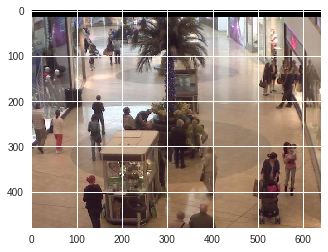

In [7]:
plt.imshow(img)
plt.show()

In [0]:
X_train = np.load('drive/Redes neuronales/Tarea 3/images_train.npy')

In [0]:

test = np.load('drive/Redes neuronales/Tarea 3/images_test.npy')

In [9]:
!ls drive/Redes\ neuronales/Tarea\ 3/

frames_train	 images_train.npy  Pregunta 2.ipynb
images_test.npy  labels_train.csv  Pregunta 3.ipynb


In [0]:
df_y = pd.read_csv('drive/Redes neuronales/Tarea 3/labels_train.csv')

In [5]:
df_y.describe()

,id,count
count,1600.00000,1600.000000
mean,1200.50000,31.070625
std,462.02453,6.992134
min,401.00000,13.000000
25%,800.75000,26.000000
50%,1200.50000,30.000000
75%,1600.25000,35.000000
max,2000.00000,50.000000


In [10]:
df_y.head()

,id,count
0,401,29
1,402,30
2,403,31
3,404,26
4,405,26


In [11]:
print(train.shape)
print(test.shape)

(1600, 480, 640, 3)
(400, 480, 640, 3)


In [0]:
idx_test = np.random.choice(np.arange(len(X_train)), 400, replace=False)
mask_test = np.zeros(len(X_train),dtype=bool) 
mask_test[idx_test] = True 

#n_train = 800
#ny_train = 

#X_train = train[~mask_test][:n_train].astype('float32')
Y_train = df_y['count'].values[~mask_test]#[:n_train]
#X_val = train[mask_test].astype('float32')
Y_val = df_y['count'].values[mask_test]


X_train, X_val = X_train[~mask_test].astype('float32'), X_train[mask_test].astype('float32')

In [0]:
X_train /= 255.0
#Y_train = to_categorical(Y_train, num_classes=51)

In [0]:
#norm
X_val /= 255.0
#Y_val = to_categorical(Y_val, num_classes=51)

In [8]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

(1200, 480, 640, 3)
(1200,)
(400, 480, 640, 3)
(400,)


In [0]:

print(X_test.shape)

In [14]:
train[0][0]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

## Arquitectura

In [0]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=X_train.shape[1:],kernel_regularizer=weight,activation='sigmoid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),padding='same'activation='sigmoid')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))  

model.add(Dense(51,activation='softmax'))

model.compile( optimizer='adam', loss='mse') #mse
model.fit(X_train, y_train,batch_size=16,epochs=150,validation_data=(X_test, y_test),verbose=1)

model malos resultados, muy malos

In [28]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), padding='same',input_shape=X_train.shape[1:],activation='relu'))
model2.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
           
model2.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model2.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(1024,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1,activation='linear'))
model2.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 480, 640, 32)      896       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 480, 640, 32)      9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 240, 320, 32)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 240, 320, 64)      18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 240, 320, 64)      36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 120, 160, 64)      0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1228800)           0         
__________

In [0]:
#train it
#optimizer_ = SGD(lr=0.01,momentum=0.9)
model2.compile(loss='mse', optimizer="adam", metrics=['accuracy'])
model2.fit(X_train, Y_train, batch_size=128,epochs=15,verbose=1, validation_data=(X_val,Y_val))

Train on 1300 samples, validate on 300 samples
Epoch 1/15


model2 ño

In [10]:
opt = rmsprop()
batch_size = 10
epochs = 25

model3 = Sequential()
model3.add(Conv2D(64, (5, 5), padding='same', input_shape=X_train.shape[1:],activation='relu'))
model3.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(32, (3, 3), padding='same',activation='relu'))
model3.add(Conv2D(32, (3, 3), padding='same',activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Flatten())
#model3.add(Dense(512,activation='relu'))
model3.add(Dense(10,activation='relu'))
model3.add(Dense(1,activation='linear'))

model3.compile(optimizer=opt,loss="mse")
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 480, 640, 64)      4864      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 480, 640, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 240, 320, 64)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 240, 320, 64)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 240, 320, 32)      18464     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 240, 320, 32)      9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 120, 160, 32)      0         
__________

In [12]:
hist_m3 = model3.fit(X_train, Y_train,epochs=epochs,batch_size=batch_size, validation_data=(X_val, Y_val), shuffle=True)

Train on 800 samples, validate on 400 samples
Epoch 1/25
800/800 [==============================] - 94s 118ms/step - loss: 422.1041 - val_loss: 427.2658
Epoch 2/25
800/800 [==============================] - 88s 110ms/step - loss: 132.4497 - val_loss: 48.0108
Epoch 3/25
800/800 [==============================] - 88s 110ms/step - loss: 88.8760 - val_loss: 59.4795
Epoch 4/25
800/800 [==============================] - 88s 110ms/step - loss: 71.4008 - val_loss: 110.4179
Epoch 5/25
800/800 [==============================] - 88s 110ms/step - loss: 59.4453 - val_loss: 35.2457
Epoch 6/25
800/800 [==============================] - 88s 110ms/step - loss: 57.4961 - val_loss: 45.7613
Epoch 7/25
800/800 [==============================] - 88s 110ms/step - loss: 215.3988 - val_loss: 64.8588
Epoch 8/25
800/800 [==============================] - 88s 110ms/step - loss: 34.1773 - val_loss: 20.4548
Epoch 9/25
800/800 [==============================] - 88s 111ms/step - loss: 36.0823 - val_loss: 16.6851
Epoc

model3 mejorando... parece~~

In [0]:
model3.save("drive/Redes neuronales/Tarea 3/m3.h5")

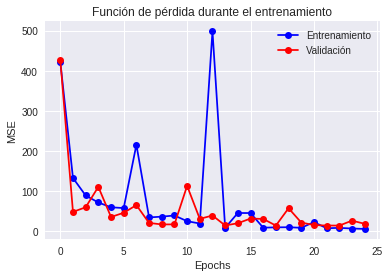

In [16]:
plt.plot(range(epochs), hist_m3.history['loss'], 'bo-', label = 'Entrenamiento')
plt.plot(range(epochs), hist_m3.history['val_loss'], 'ro-', label = 'Validación')
plt.title('Función de pérdida durante el entrenamiento')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [0]:
pred_m3 = model3.predict(X_train[:20]) 

In [20]:
pred_m3

array([[27.55176 ],
       [28.801653],
       [24.559893],
       [24.650225],
       [25.535933],
       [26.349865],
       [28.558277],
       [34.851006],
       [33.81912 ],
       [38.339577],
       [36.865234],
       [39.319733],
       [33.08564 ],
       [32.679066],
       [36.416897],
       [34.53402 ],
       [39.045116],
       [33.376648],
       [40.836884],
       [36.022575]], dtype=float32)

In [22]:
Y_train[:20]

array([29, 31, 26, 26, 28, 27, 31, 37, 37, 41, 40, 42, 36, 37, 38, 37, 40,
       37, 41, 37])

In [0]:
test /= 255.0

In [0]:
y_pred_m3 = model3.predict(test) 

In [29]:
y_pred_m3

array([[28.620975],
       [33.943134],
       [35.804096],
       [31.226292],
       [36.233475],
       [33.861343],
       [31.40075 ],
       [31.352638],
       [24.411125],
       [25.030483],
       [21.5725  ],
       [19.499924],
       [21.114452],
       [23.490452],
       [16.83248 ],
       [17.757652],
       [16.025177],
       [22.793606],
       [26.690033],
       [25.315105],
       [26.822224],
       [21.507145],
       [24.21297 ],
       [22.128227],
       [22.038546],
       [22.334044],
       [23.765635],
       [19.743666],
       [24.829838],
       [22.877352],
       [23.662052],
       [24.832804],
       [21.47552 ],
       [19.73273 ],
       [17.575193],
       [21.549496],
       [25.260944],
       [22.134514],
       [22.635584],
       [26.537497],
       [25.602686],
       [21.19317 ],
       [19.208853],
       [18.55799 ],
       [25.338284],
       [24.79763 ],
       [21.054749],
       [22.538132],
       [22.650618],
       [25.926855],


In [0]:
test_ids = np.array(range(1,401))

In [0]:
prediction_test = np.concatenate(np.round(y_pred_m3))

In [36]:
print(test_ids.shape)
print(prediction_test.shape)
print(y_pred_m3.shape)

(400,)
(400,)
(400, 1)


In [0]:
d = {'id': test_ids, 'count': prediction_test}
entrega = pd.DataFrame(data=d,columns=['id','count'])
entrega.to_csv('drive/Redes neuronales/Tarea 3/mysubmission.csv', index=False)

In [0]:
def plot_train(hist):
  plt.subplot(121)
  plt.plot(range(epochs), hist.history['loss'], 'bo-', label = 'Entrenamiento')
  plt.title('Función de pérdida durante el entrenamiento')
  plt.ylabel('MSE')
  plt.xlabel('Epochs')
  
  
  plt.subplot(122)
  plt.plot(range(epochs), hist.history['val_loss'], 'ro-', label = 'Validación')
  plt.title('Función de pérdida durante el entrenamiento')
  plt.ylabel('MSE')
  plt.xlabel('Epochs')
  
  plt.legend()
  plt.show()

In [0]:
def create_sub(prediction_test, name = 'mysubmission'):
  test_ids = np.array(range(1,401))
  d = {'id': test_ids, 'count': prediction_test}
  entrega = pd.DataFrame(data=d,columns=['id','count'])
  entrega.to_csv('drive/Redes neuronales/Tarea 3/'+name+'.csv', index=False)

In [14]:
opt = rmsprop()
batch_size = 16
epochs = 20

model4 = Sequential()
model4.add(Conv2D(64, (5, 5), padding='same', input_shape=X_train.shape[1:],activation='relu'))
model4.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))

model4.add(Conv2D(32, (3, 3), padding='same',activation='relu'))
model4.add(Conv2D(32, (3, 3), padding='same',activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))

model4.add(Flatten())
model4.add(Dense(32,activation='relu'))
model4.add(BatchNormalization())
model4.add(Dense(1,activation='linear'))

model4.compile(optimizer=opt,loss="mse")
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 480, 640, 64)      4864      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 480, 640, 64)      36928     
_________________________________________________________________
batch_normalization_7 (Batch (None, 480, 640, 64)      256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 240, 320, 64)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 240, 320, 64)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 240, 320, 32)      18464     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 240, 320, 32)      9248      
__________

In [15]:
hist_m4 = model4.fit(X_train, Y_train,epochs=epochs,batch_size=batch_size, validation_data=(X_val, Y_val), shuffle=True)

Train on 1200 samples, validate on 400 samples
Epoch 1/30
1200/1200 [==============================] - 150s 125ms/step - loss: 960.4460 - val_loss: 1976.1498
Epoch 2/30
1200/1200 [==============================] - 142s 119ms/step - loss: 885.6131 - val_loss: 1173.4451
Epoch 3/30
1200/1200 [==============================] - 142s 119ms/step - loss: 798.4834 - val_loss: 1102.5491
Epoch 4/30
1200/1200 [==============================] - 142s 118ms/step - loss: 698.6486 - val_loss: 1276.2367
Epoch 5/30
1200/1200 [==============================] - 142s 118ms/step - loss: 590.3207 - val_loss: 696.6438
Epoch 6/30
1200/1200 [==============================] - 142s 118ms/step - loss: 474.2465 - val_loss: 375.4185
Epoch 7/30
1200/1200 [==============================] - 142s 118ms/step - loss: 358.1897 - val_loss: 98.6137
Epoch 8/30
1200/1200 [==============================] - 142s 118ms/step - loss: 249.8851 - val_loss: 119.6841
Epoch 9/30
1200/1200 [==============================] - 142s 118ms/ste

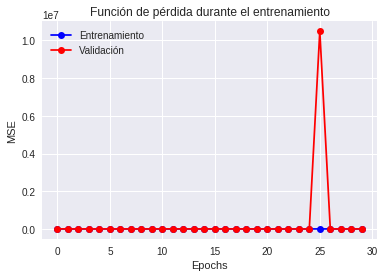

In [16]:
plot_train(hist_m4)

In [0]:
model4.save("drive/Redes neuronales/Tarea 3/m4.h5")

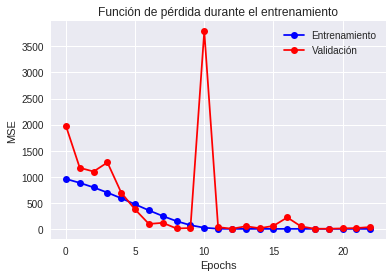

In [19]:
stop = 23
plt.plot(range(stop), hist_m4.history['loss'][:stop], 'bo-', label = 'Entrenamiento')
plt.plot(range(stop), hist_m4.history['val_loss'][:stop], 'ro-', label = 'Validación')
plt.title('Función de pérdida durante el entrenamiento')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [0]:
test = np.load('drive/Redes neuronales/Tarea 3/images_test.npy')

In [0]:
test = test.astype('float32')

In [0]:
test /= 255.0

In [0]:
y_pred_m4 = model4.predict(test) 

In [0]:
prediction_test_4 = np.concatenate(np.round(y_pred_m4))

In [0]:
create_sub(prediction_test_4, "sub2")

*model5*: 
  * cambiar optimizador: rmsprop por sgd
  * cambio tamaño kernel en primera convolución de segunda tanda
  * aumentar primera capa densa

In [9]:
#opt = rmsprop()
opt = SGD(lr=0.01,momentum=0.7)
batch_size = 16
epochs = 30

model5 = Sequential()
model5.add(Conv2D(64, (5, 5), padding='same', input_shape=X_train.shape[1:],activation='relu'))
model5.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.3))

model5.add(Conv2D(32, (5, 5), padding='same',activation='relu'))
model5.add(Conv2D(32, (3, 3), padding='same',activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.3))
           
model5.add(Flatten())
model5.add(Dense(64,activation='relu'))
           
model5.add(BatchNormalization())
model5.add(Dense(1,activation='linear'))

model5.compile(optimizer=opt,loss="mse")
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 480, 640, 64)      4864      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 480, 640, 64)      36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 480, 640, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 240, 320, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 240, 320, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 240, 320, 32)      51232     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 240, 320, 32)      9248      
__________

In [10]:
hist_m5 = model5.fit(X_train, Y_train,epochs=epochs,batch_size=batch_size, validation_data=(X_val, Y_val), shuffle=True)

Train on 1200 samples, validate on 400 samples
Epoch 1/30
1200/1200 [==============================] - 157s 131ms/step - loss: 89.9238 - val_loss: 51536.9757
Epoch 2/30
1200/1200 [==============================] - 150s 125ms/step - loss: 18.8284 - val_loss: 10.8959
Epoch 3/30
1200/1200 [==============================] - 150s 125ms/step - loss: 14.9403 - val_loss: 17.7409
Epoch 4/30
1200/1200 [==============================] - 150s 125ms/step - loss: 13.6870 - val_loss: 7.7181
Epoch 5/30
1200/1200 [==============================] - 150s 125ms/step - loss: 7.5119 - val_loss: 23.9980
Epoch 6/30
1200/1200 [==============================] - 150s 125ms/step - loss: 10.8130 - val_loss: 6.2640
Epoch 7/30
1200/1200 [==============================] - 150s 125ms/step - loss: 10.6259 - val_loss: 5.3797
Epoch 8/30
1200/1200 [==============================] - 150s 125ms/step - loss: 9.2637 - val_loss: 6.7223
Epoch 9/30
1200/1200 [==============================] - 149s 124ms/step - loss: 11.0609 - va

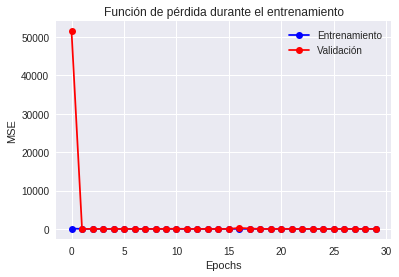

In [14]:
plot_train(hist_m5)

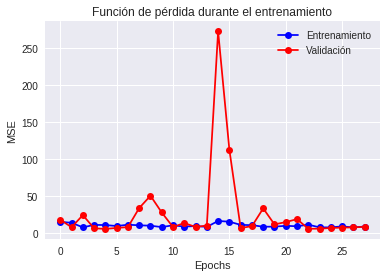

In [17]:
start = 23
plt.plot(range(28), hist_m5.history['loss'][2:], 'bo-', label = 'Entrenamiento')
plt.plot(range(28), hist_m5.history['val_loss'][2:], 'ro-', label = 'Validación')
plt.title('Función de pérdida durante el entrenamiento')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [0]:
test = np.load('drive/Redes neuronales/Tarea 3/images_test.npy')

In [0]:
test = test.astype('float32')

In [0]:
test /= 255.0

In [0]:
y_pred_m5 = model5.predict(test) 

In [0]:
prediction_test_5 = np.concatenate(np.round(y_pred_m5))
create_sub(prediction_test_5, "sub3")

*mdel5* no mejora a *model4* seguir probando~

*model6*: inspirado en arquitectura ccnn http://agamenon.tsc.uah.es/Investigacion/gram/publications/eccv2016-onoro.pdf

In [9]:
opt = rmsprop()
#opt = SGD(lr=0.1,momentum=0.7)
batch_size = 16
epochs = 30

model6 = Sequential()
model6.add(Conv2D(64, (5, 5), padding='same', input_shape=X_train.shape[1:],activation='relu'))
model6.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Dropout(0.3))

model6.add(Conv2D(64, (5, 5), padding='same',activation='relu'))
model6.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Dropout(0.3))

model6.add(Conv2D(64, (5, 5), padding='same',activation='relu'))
model6.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(4, 4)))
model6.add(Dropout(0.3))

model6.add(Conv2D(1000, (5, 5), padding='same',activation='relu'))
model6.add(Conv2D(1000, (3, 3), padding='same',activation='relu'))
model6.add(BatchNormalization())
model6.add(Dropout(0.3))

model6.add(Conv2D(400, (5, 5), padding='same',activation='relu'))
model6.add(Conv2D(400, (3, 3), padding='same',activation='relu'))
model6.add(BatchNormalization())
model6.add(Dropout(0.3))
           
model6.add(Conv2D(1, (5, 5), padding='same',activation='relu'))
model6.add(Conv2D(1, (3, 3), padding='same',activation='relu'))
model6.add(BatchNormalization())
model6.add(Dropout(0.3))

model6.add(Flatten())
model6.add(Dense(64,activation='relu'))
           
model6.add(BatchNormalization())
model6.add(Dense(1,activation='linear'))

model6.compile(optimizer=opt,loss="mse")
model6.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 480, 640, 64)      4864      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 480, 640, 64)      36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 480, 640, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 240, 320, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 240, 320, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 240, 320, 64)      102464    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 240, 320, 64)      36928     
__________

In [10]:
hist_m6 = model6.fit(X_train, Y_train,epochs=epochs,batch_size=batch_size, validation_data=(X_val, Y_val), shuffle=True)

Train on 1200 samples, validate on 400 samples
Epoch 1/30
1200/1200 [==============================] - 212s 177ms/step - loss: 978.2767 - val_loss: 221.9296
Epoch 2/30
1200/1200 [==============================] - 196s 163ms/step - loss: 892.4036 - val_loss: 954.1629
Epoch 3/30
1200/1200 [==============================] - 196s 163ms/step - loss: 768.9803 - val_loss: 522.6831
Epoch 4/30
1200/1200 [==============================] - 196s 163ms/step - loss: 626.2190 - val_loss: 637.4736
Epoch 5/30
1200/1200 [==============================] - 196s 163ms/step - loss: 468.0339 - val_loss: 292.0122
Epoch 6/30
1200/1200 [==============================] - 196s 163ms/step - loss: 309.8281 - val_loss: 518.6595
Epoch 7/30
1200/1200 [==============================] - 196s 163ms/step - loss: 170.1566 - val_loss: 49.5647
Epoch 8/30
1200/1200 [==============================] - 196s 163ms/step - loss: 69.1705 - val_loss: 359.9816
Epoch 9/30
1200/1200 [==============================] - 196s 163ms/step - l

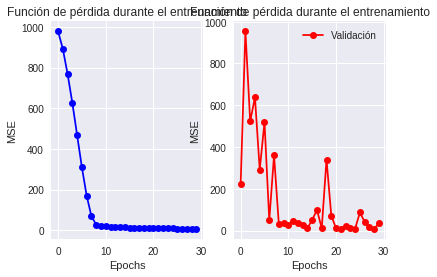

In [14]:
plot_train(hist_m6)


In [0]:
y_pred_m6 = model6.predict(test) 

prediction_test_6 = np.concatenate(np.round(y_pred_m6))
create_sub(prediction_test_6, "sub4")

In [0]:
model6.save("drive/Redes neuronales/Tarea 3/m6.h5")

In [9]:
opt = rmsprop()
batch_size = 16
epochs = 20

model7 = Sequential()
model7.add(Conv2D(64, (5, 5), padding='same', input_shape=X_train.shape[1:],activation='relu'))
model7.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model7.add(BatchNormalization())
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(Dropout(0.25))

model7.add(Conv2D(32, (3, 3), padding='same',activation='relu'))
model7.add(Conv2D(32, (3, 3), padding='same',activation='relu'))
model7.add(BatchNormalization())
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(Dropout(0.25))

model7.add(Flatten())
model7.add(Dense(32,activation='relu'))
model7.add(BatchNormalization())
model7.add(Dense(1,activation='linear'))

model7.compile(optimizer=opt,loss="mse")
model7.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 480, 640, 64)      4864      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 480, 640, 64)      36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 480, 640, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 240, 320, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 240, 320, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 240, 320, 32)      18464     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 240, 320, 32)      9248      
__________

Seguir entrenando la que funcionó bien *model4*

In [0]:
from keras.models import load_model

In [0]:

model4_1 = load_model("drive/Redes neuronales/Tarea 3/m4.h5")
#ssffdgggggg

In [26]:
hist_m4_1 = model4_1.fit(X_train, Y_train,epochs=epochs,batch_size=batch_size, validation_data=(X_val, Y_val), shuffle=True)

Train on 1200 samples, validate on 400 samples
Epoch 1/20
1200/1200 [==============================] - 145s 121ms/step - loss: 3.4223 - val_loss: 7.1406
Epoch 2/20
1200/1200 [==============================] - 145s 121ms/step - loss: 3.8279 - val_loss: 1.3250
Epoch 3/20
1200/1200 [==============================] - 145s 121ms/step - loss: 3.8927 - val_loss: 1.2926
Epoch 4/20
1200/1200 [==============================] - 145s 121ms/step - loss: 3.7846 - val_loss: 4.1130
Epoch 5/20
1200/1200 [==============================] - 145s 121ms/step - loss: 4.0512 - val_loss: 8.6264
Epoch 6/20
1200/1200 [==============================] - 145s 121ms/step - loss: 4.0742 - val_loss: 4.6807
Epoch 7/20
1200/1200 [==============================] - 145s 121ms/step - loss: 3.1414 - val_loss: 3.5462
Epoch 8/20
1200/1200 [==============================] - 145s 121ms/step - loss: 2.9957 - val_loss: 1.5294
Epoch 9/20
1200/1200 [==============================] - 145s 121ms/step - loss: 4.2426 - val_loss: 3.0869

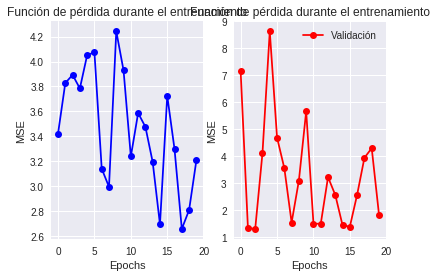

In [27]:
plot_train(hist_m4_1)

In [0]:
model4_1.save("drive/Redes neuronales/Tarea 3/m4_20.h5")

In [0]:
test = np.load('drive/Redes neuronales/Tarea 3/images_test.npy')
test = test.astype('float32')
test /= 255.0


In [0]:
y_pred_m4_1 = model4_1.predict(test)
prediction_test_4_1 = np.concatenate(np.round(y_pred_m4_1))
create_sub(prediction_test_4_1, "sub2.20")

Finalmente el modelo *model4_1* con el cual hemos obtenido los mejores resultados, los cuales fueron subidos a Kaggle. Cabe destacar que este modelo es el mismo que *model4* pero con más epoch de entrenamiento.